In [56]:
import numpy as np
from sklearn import datasets

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)] # petal length, petal width
# y = (iris["target"] == 2).astype(np.float64) # Iris virginica
y = iris["target"] # checking for SVM 3 types classification

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [57]:
svm_clf = Pipeline([
     ("scaler", StandardScaler()),
     ("linear_svc", LinearSVC(C=1, loss="hinge")),
  ])

svm_clf.fit(X, y)

svm_clf.predict([[5.5, 1.7]])

/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


array([2])

In [58]:
from sklearn.linear_model import SGDClassifier

sgd_clf = Pipeline([
      ("scaler", StandardScaler()),
      ("sgd", SGDClassifier(loss="hinge", alpha=0.01)),
  ])  # alpha=1/C

sgd_clf.fit(X, y)

sgd_clf.predict([[5.5, 1.7],[2,3]])

array([2, 2])

In [59]:
import numpy as np
from sklearn import datasets
iris = datasets.load_iris()
X = iris["data"][:, (2, 3)] # petal length, petal width
# y = (iris["target"] == 2).astype(np.float64) # Iris virginica
y = iris["target"]

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1)

In [61]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [62]:
# trying different kernels

from sklearn.svm import LinearSVC
svm_clf = LinearSVC(C=1, loss="hinge")
svm_clf.fit(X_train,y_train)

# from sklearn.svm import SVC
# svm_clf = SVC(kernel="poly", degree=3, C=5)
# svm_clf.fit(X_train, y_train)

# from sklearn.svm import SVC
# svm_clf = SVC(kernel="rbf", gamma=5, C=1)
# svm_clf.fit(X_train, y_train)

LinearSVC(C=1, loss='hinge')

In [63]:
y_hat=svm_clf.predict(X_test)

In [64]:
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/Perceptron')
work_path = os.getcwd()
print(work_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Perceptron


In [65]:
# import matplotlib.pyplot as plt
# from PlotClassification import plot_decision_regions

/content/drive/MyDrive/Perceptron/PlotClassification.py:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


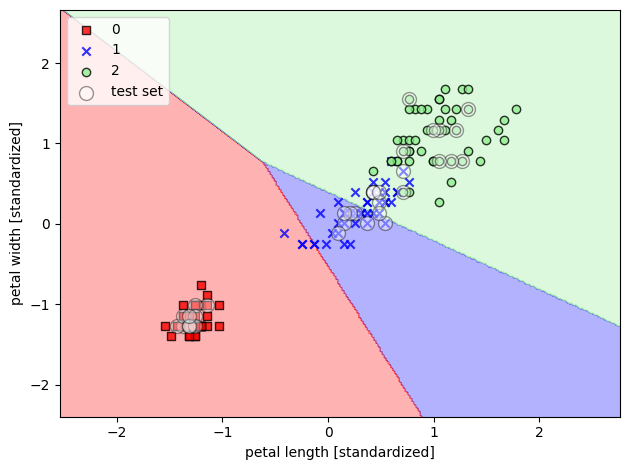

In [66]:
import matplotlib.pyplot as plt
from PlotClassification import plot_decision_regions

import numpy as np
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined, classifier=svm_clf, test_idx=range(115, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()